In [8]:
using Gadfly

###  最速下降法

In [12]:
norm(x) = sqrt(x'*x)
function steepest_descent(f, g, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        maxIterations=128,
        debug=false) 
    
   
    xk = x0
    l = [xk]
    fk = f(xk...)
    for i in 1:maxIterations
        # iteration
        d =-g(xk...)
        α = search_for_alpha(f, xk, fk, d, -d)
        δ = α*d
        xn = xk .+ δ
        push!(l,xn)
        fn = f(xn...)
        # convegence?
        if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return l
        end
        if debug
            println("i=",i, " α=", α, " xk=", xk, " d=", d, " δ= ",δ)
        end
        xk = xn
        fk = fn
    end
    println("WARN:", maxIterations, " iterations have been exceeded!")
end

steepest_descent (generic function with 1 method)

In [13]:
function search_for_alpha(f, xk, fk, d, g; α0=100, ϵ=0.5, τ=0.5)
    α = α0
    ϕ0= d'*g
    while f((xk .+ α*d)...) > fk + ϵ*α*ϕ0
        α = τ*α
    end
    return α 
end

search_for_alpha (generic function with 1 method)

In [14]:
l1 = steepest_descent(
    (x1,x2)->x1^2+4.5x2^2+3x1*x2-x1-5x2,
    (x1,x2)->[2x1+3x2-1; 9x2+3x1-5],
    [1., 3.],
    maxIterations = 10000,
    debug=false
)

Convergence is reached after 13 iterations.


14-element Array{Array{Float64,1},1}:
 [1.0, 3.0]           
 [0.0234375, 0.558594]
 [-0.117706, 0.53952] 
 [-0.19254, 0.636676] 
 [-0.295069, 0.606898]
 [-0.340099, 0.689539]
 [-0.378031, 0.671419]
 [-0.579745, 0.742766]
 [-0.606624, 0.763992]
 [-0.614312, 0.758518]
 [-0.650975, 0.771234]
 [-0.655566, 0.775851]
 [-0.657169, 0.774292]
 [-0.66384, 0.776541] 

In [15]:
fit = layer((x1,x2)->x1^2+4.5x2^2+3x1*x2-x1-5x2,  -2, 2,-1, 3)

1-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:xmin=>[-2],:xmax=>[2],:ymin=>[-1],:ymax=>[3],:z=>##36#37()), Gadfly.StatisticElement[], Gadfly.Geom.LineGeometry(Gadfly.Stat.ContourStatistic(15, 150), true, 2, Symbol("")), nothing, 0)

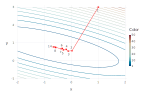

In [16]:
pic1=
layer(x=[l1[i][1] for i in 1:length(l1)],
      y=[l1[i][2] for i in 1:length(l1)],
      label=[string(i) for i in 1:length(l1)],
      #coord = Coord.cartesian(xmin=-1, xmax=1, ymin=0, ymax=1)
      Geom.point,Geom.line,Geom.label,#Geom.vector
    Theme(default_color = "red")
)
plot(pic1,fit)

###  牛顿法

In [17]:
function Newton(f, g, h, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        maxIterations=128,
        debug=false) 
    
    xk = x0
    l = [xk]
    fk = f(xk...)
    for i in 1:maxIterations
        # iteration
        d =-inv(h(xk...))*g(xk...)
        α = 1
        δ = α*d
        xn = xk .+ δ
        push!(l,xn)
        fn = f(xn...)
        # convegence?
        if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return l
        end
        if debug
            println("i=",i, " α=", α, " xk=", xk, " xn=", xn, " d=", d, " δ= ",δ)
            println("fk=", fk, "\tfn=", fn)
        end
        xk = xn
        fk = fn
    end
    println("WARN:", maxIterations, " iterations have been exceeded!")
end

Newton (generic function with 1 method)

In [18]:
l2 = Newton(
    (x1,x2)->x1^2+4.5x2^2+3x1*x2-x1-5x2,
    (x1,x2)->[2x1+3x2-1; 9x2+3x1-5],
    (x,y)->[2 3;
            3 9],
    [1.,3.],
    maxIterations = 10000000,
    debug=true
)

i=1 α=1 xk=[1.0, 3.0] xn=[-0.666667, 0.777778] d=[-1.66667, -2.22222] δ= [-1.66667, -2.22222]
fk=34.5	fn=-1.6111111111111112
Convergence is reached after 2 iterations.


3-element Array{Array{Float64,1},1}:
 [1.0, 3.0]           
 [-0.666667, 0.777778]
 [-0.666667, 0.777778]

In [19]:
fit = layer((x1,x2)->x1^2+4.5x2^2+3x1*x2-x1-5x2, -2, 2,-1, 3)

1-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:xmin=>[-2],:xmax=>[2],:ymin=>[-1],:ymax=>[3],:z=>##49#50()), Gadfly.StatisticElement[], Gadfly.Geom.LineGeometry(Gadfly.Stat.ContourStatistic(15, 150), true, 2, Symbol("")), nothing, 0)

In [20]:
l2

3-element Array{Array{Float64,1},1}:
 [1.0, 3.0]           
 [-0.666667, 0.777778]
 [-0.666667, 0.777778]

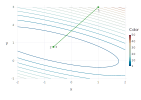

In [21]:
pic2=
layer(x=[l2[i][1] for i in 1:length(l2)],
      y=[l2[i][2] for i in 1:length(l2)],
      label=[string(i) for i in 1:length(l2)],
      #coord = Coord.cartesian(xmin=-1, xmax=1, ymin=0, ymax=1)
      Geom.point,Geom.line,Geom.label,#Geom.vector
      Theme(default_color = "green")
)
plot(pic2,fit)

###  共轭梯度法

In [33]:
norm(x) = sqrt(x'*x)
function ConjugateGradientFSO(f, g, h, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        debug=false)
    #check arguments
    n, m=size(h)
    if n≠m
        error("ERROR: Matrix H is not square!")
    end
    maxIterations = n
    xk = x0
    l = [xk]
    fk = f(xk...)
    gk = g(xk...)
    rk = -gk
    dk = rk
    dh = dk'*h*dk
    α =  dk'*rk/dh
    δ =  α .*dk
    xn = xk .+ δ
    push!(l,xn)
    fn = f(xn...)
    gn = g(xn...)
    rn = -gn
    βn = dk'*h*rn/dh
    dn = rn .- βn.*dk
    for i in 1:maxIterations+2
        # iteration
        # convegence?
        #if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(gn)<=ϵg)
        if (norm(gn)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return l
        else
            xk = xn
            fk = fn
            dk = dn
        end
        fn = f(xn...)
        gn = g(xn...)
        rn = -gn
        βn = dk'*h*rn/dh
        dn = rn .- βn.*dk
        dh = dn'*h*dn
        α  = dn'*rn/dh
        δ  = α.*dn
        xn = xk .+ δ
        push!(l,xn)
        if debug
            println("i=",i," x=", xn, " α=", α, " β=", βn, " gn=", gn, " d=", dn, " δ= ",δ)
        end
    end
    #println("WARN:", maxIterations, " iterations have been exceeded!")
end

ConjugateGradientFSO (generic function with 1 method)

In [34]:
l3 = ConjugateGradientFSO(
        (x1,x2)->x1^2+4.5x2^2+3x1*x2-x1-5x2,
        (x1,x2)->[2x1+3x2-1; 9x2+3x1-5],
        [2 3;
        3 9],
        [1.,3.],
        debug=false)

Convergence is reached after 4 iterations.


5-element Array{Array{Float64,1},1}:
 [1.0, 3.0]           
 [0.0102389, 0.525597]
 [-0.655946, 0.792072]
 [-0.666667, 0.777778]
 [-0.666667, 0.777778]

In [35]:
fit = layer((x1,x2)->x1^2+4.5x2^2+3x1*x2-x1-5x2, -2, 2, -1, 3)

1-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:xmin=>[-2],:xmax=>[2],:ymin=>[-1],:ymax=>[3],:z=>##92#93()), Gadfly.StatisticElement[], Gadfly.Geom.LineGeometry(Gadfly.Stat.ContourStatistic(15, 150), true, 2, Symbol("")), nothing, 0)

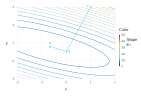

In [36]:
pic3=
layer(x=[l3[i][1] for i in 1:length(l3)],
      y=[l3[i][2] for i in 1:length(l3)],
      label=[string(i) for i in 1:length(l3)],
      #coord = Coord.cartesian(xmin=-1, xmax=1, ymin=0, ymax=1)
      Geom.point,Geom.line,Geom.label,#Geom.vector
      shape=[Shape.square]
)
plot(pic3,fit)

### 画在一张图中

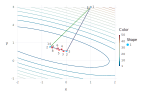

In [37]:
plot(pic3,pic1,pic2,fit)